# Task 1: Prepare a complete data analysis report on the concrete data.

### Data Analysis Report

 ### 1. Introduction

This project aims to perform a comprehensive analysis of a concrete dataset to understandthe relationships between its constituent 
materials and its resulting compressive strength.
Using this analysis, we also develop a predictive machine learning model capable of estimating the future strength of a concrete mix
based on its composition and age.

Such predictive capabilities can help civil engineers, architects, and construction professionals optimize mix designs, reduce material
costs, and ensure the structural performance of concrete in diverse environmental conditions.

### 2. Dataset Overview

Total records: 1030

Features: 8 input features + 1 target (strength)

Objective: Predict concrete compressive strength (in MPa) based on mix ingredients and age.

### 3. Data Loading & Overview

Loading the data from values.csv and lables.csv

Missing values: No missing values found in any column.

Data types: All columns are numerical (float or integer).

Outliers: Some variables like superplastic and age show wide variation — needs scaling or log transformation in modeling if used with linear models.

### 4. Exploratroy Data Analysis

***4.1 Data Summary***
Basic statisic
- Summary f numerical variables : Mean ,standard deviation,min,max,quartiles.
- Distribution of variables


***4.2 Visual Analysis***

   ***- Univariate Analysis***

    Plot distributions for numerical features(Histogram)

   ***- Bivariate Analysis***

    Correlation heatmap
    Boxplots by target

   ***- Outlier detection***

    Boxplot for outlier check

   ***- Pairwise Relationships***

    Pairplot to see interaction between features

   ***- Missing data analysis*** 

    Identify any missing value in dataset.
    Visualize missing data patterns (eg.Heatmap, matrix map)


### 5. Data prepocessing


   1. Check for missing values.

    Check missing values
    visualize the missing values

   2. Outlier detection & Treatment (IQR Method)

    Define a function to detect outliers using IQR
    Apply outlier removal

   3. Feature Engineering

    Derive average donation frequency (example feature)
    Check new feature

   4. Scaling Features

    Features to scale (exclude target)

   5. Train-Test Split

    Split the dataset



### 6. Model selection & Evalution

   - Import Models and Metrics
   - Train and Evaluate Multiple Models

    Define models
    Dictionary to store results
    Train and evaluate
    Convert results to DataFrame
   - Classification Report
   - Cross-Validation


### 7. Review & Insights

This project focused on analyzing a dataset of concrete mixtures to understand the key factors influencing compressive 
strength and to develop a predictive machine learning model. The data was clean, numeric, and well-structured, with no
missing values across 1030 records.

Exploratory analysis revealed that cement and age are the most influential factors positively affecting concrete strength,
while excess water tends to reduce it. A correlation heatmap and descriptive statistics supported these insights.

### 8. Conclusion

In this project, we analyzed a dataset containing information on concrete mix components and their impact on compressive strength. The goal was to identify key influencing factors and build a predictive machine learning model.

Key findings from the data analysis:

Cement and age are the most positively correlated features with strength.

Water shows a negative impact, aligning with known construction principles.

The data was clean, numerical, and ready for modeling without major preprocessing.

# Task 2: Create a machine learning model which can predict the future strength of a concrete mix, based on its constituents’ composition and also the age of the mix.

In [70]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load the data
Data=pd.read_csv('concrete.csv')

In [72]:
Data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Basic checks

In [73]:
# no of rows and columns
Data.shape

(1030, 9)

In [74]:
# first five rows
Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [75]:
# last five rows
Data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [76]:
# columns
Data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [77]:
#data type of each columns
Data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [78]:
# memory usage
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [79]:
# unique values in strength
Data['strength'].value_counts()

strength
33.40    6
77.30    4
79.30    4
31.35    4
71.30    4
        ..
47.40    1
51.96    1
56.74    1
17.57    1
32.77    1
Name: count, Length: 845, dtype: int64

In [80]:
#Split Features and Target
X = Data.drop("strength", axis=1)
y = Data["strength"]

In [81]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [82]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [83]:
Data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [84]:
# checking for missing values
Data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### EDA(Exploratory Data Analysis)

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplastic'}>,
        <Axes: title={'center': 'coarseagg'}>],
       [<Axes: title={'center': 'fineagg'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'strength'}>]], dtype=object)

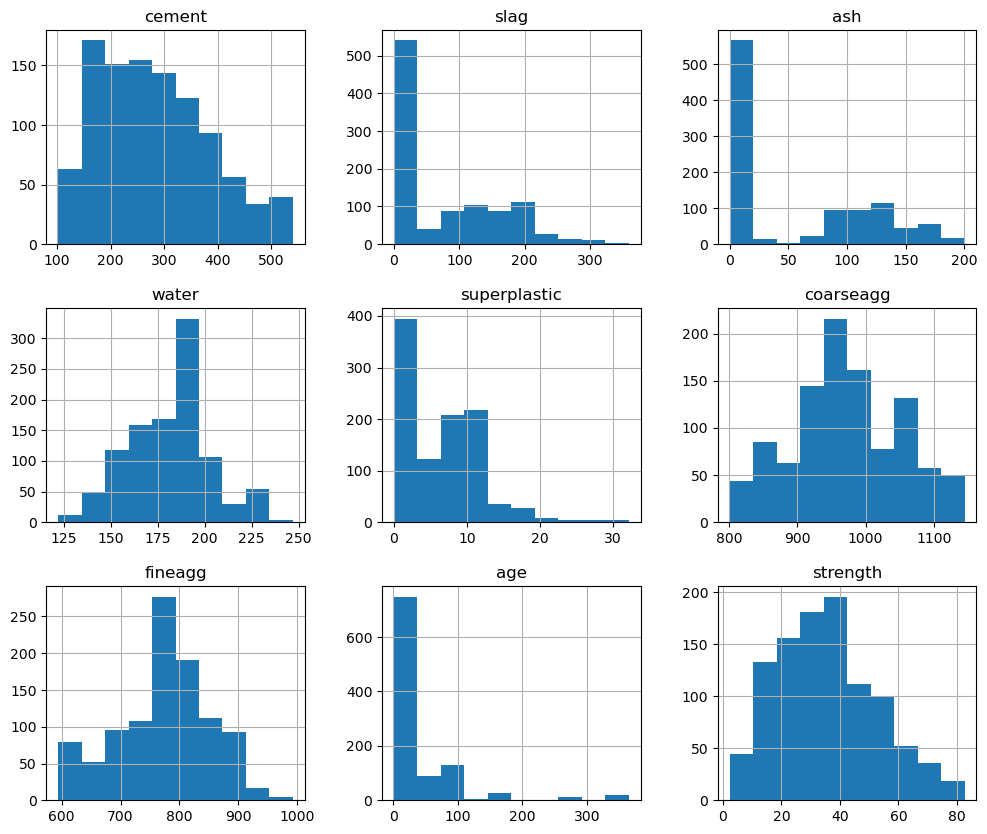

In [85]:
#Distribution Plot
#Check skewness in age, superplastic, ash
#Check normality in strength (target)
Data.hist(figsize=(12,10))


***insights:*** cement and age  strength (positive correlation)

water  strength (negative correlation)

slag, ash, superplastic – moderate influence

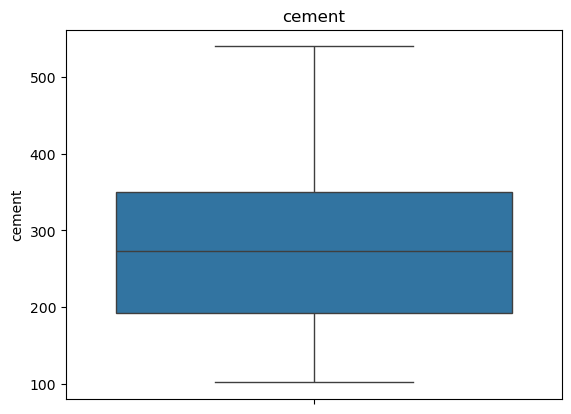

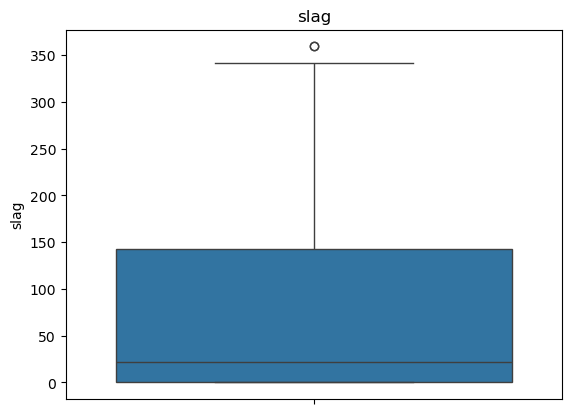

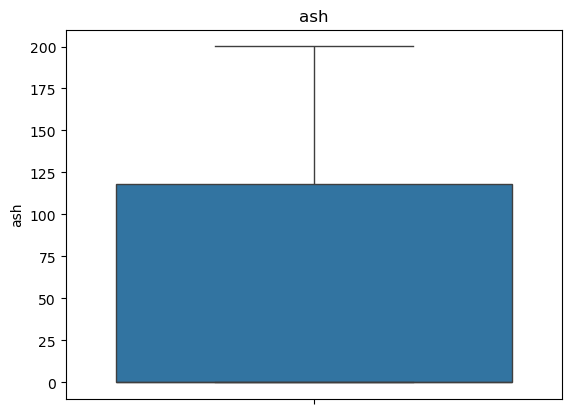

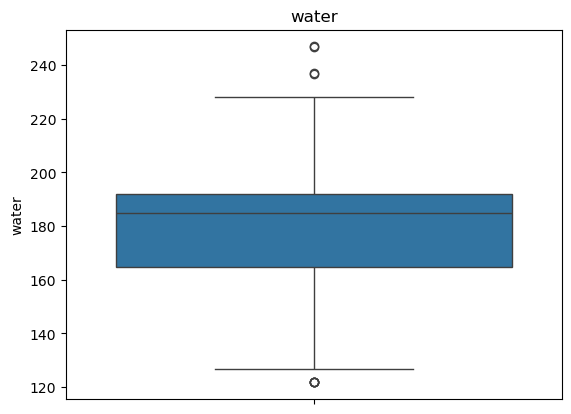

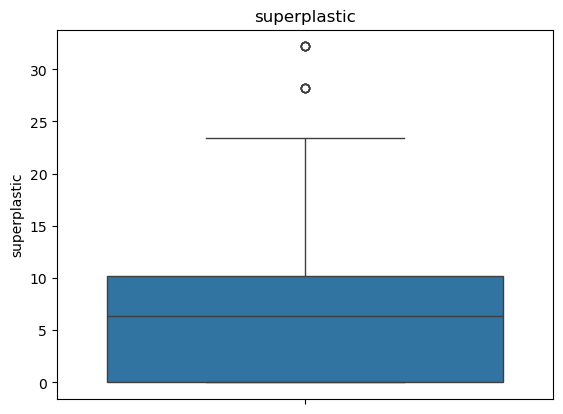

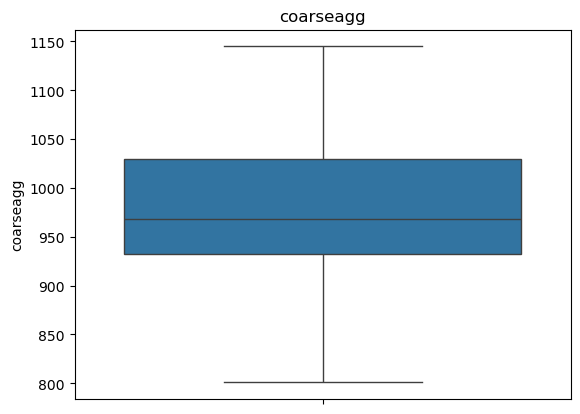

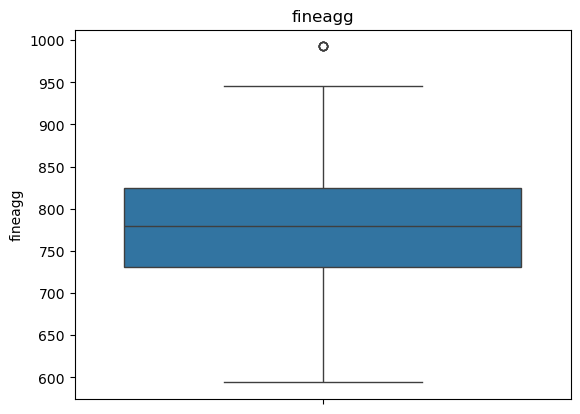

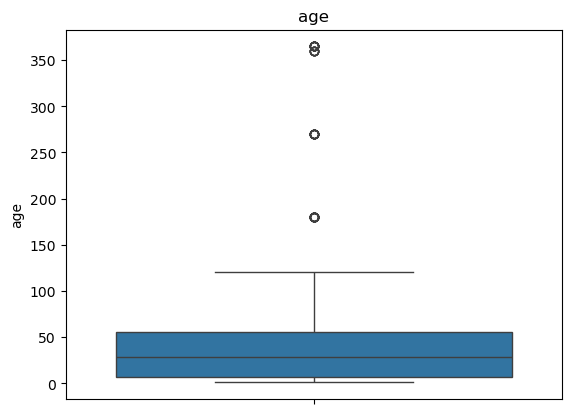

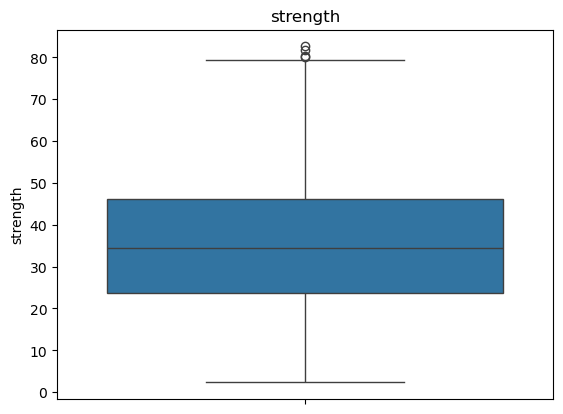

In [86]:
# Outliers
for col in Data.columns:
    sns.boxplot(Data[col])
    plt.title(col)
    plt.show()


High outliers in superplastic and age

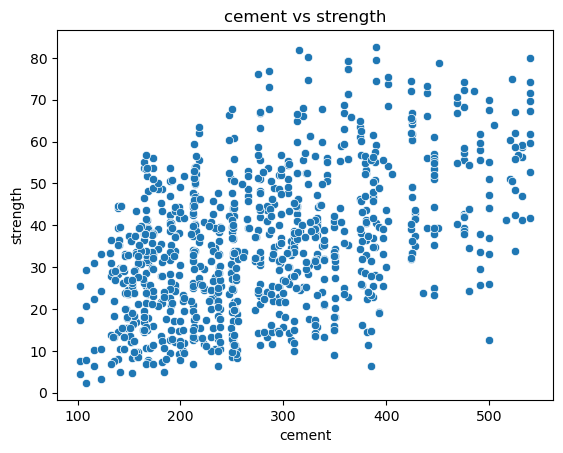

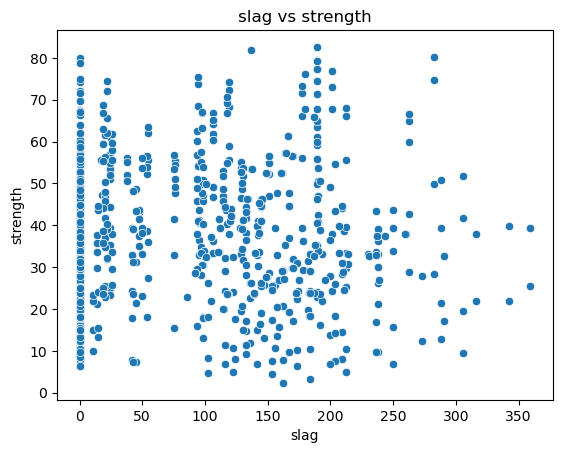

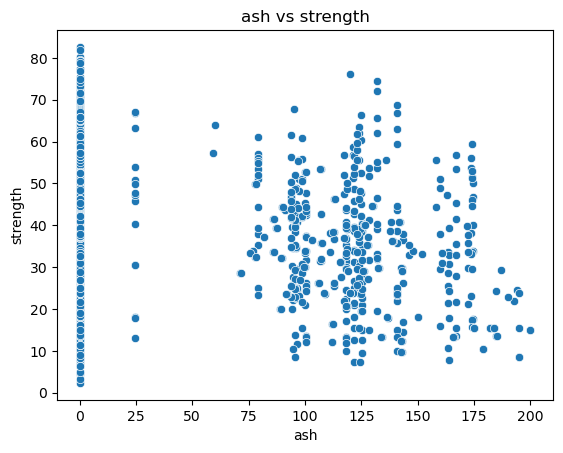

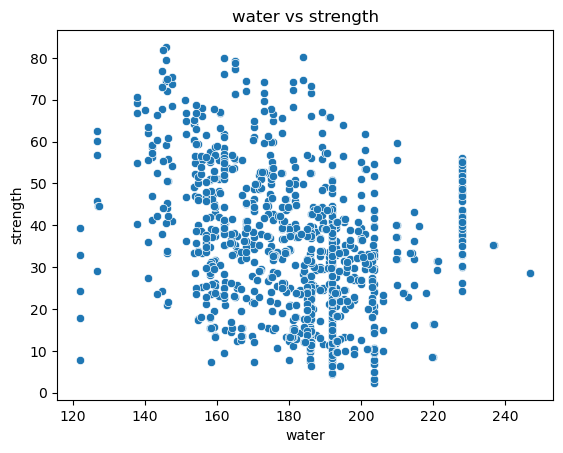

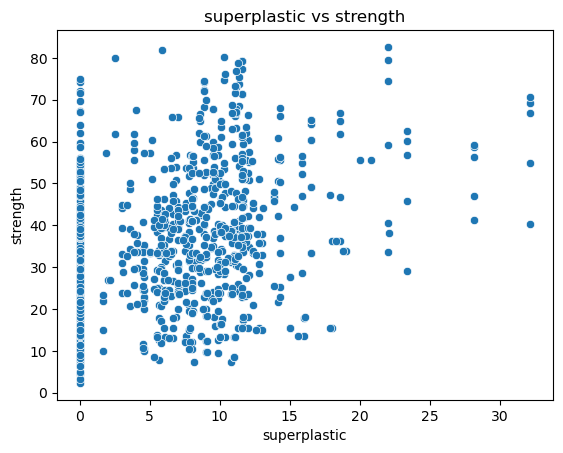

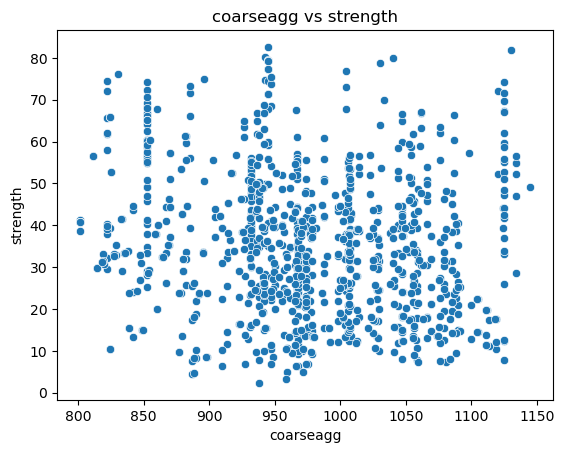

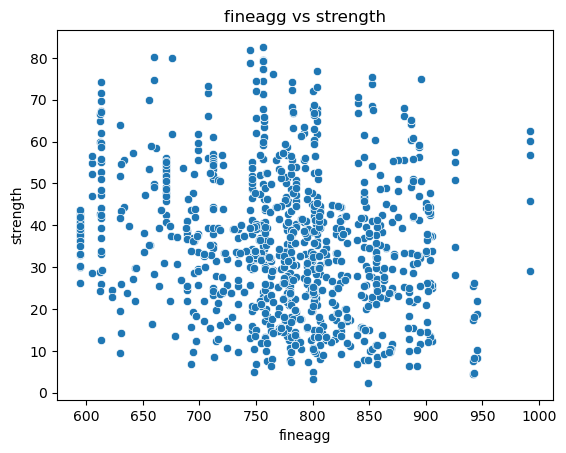

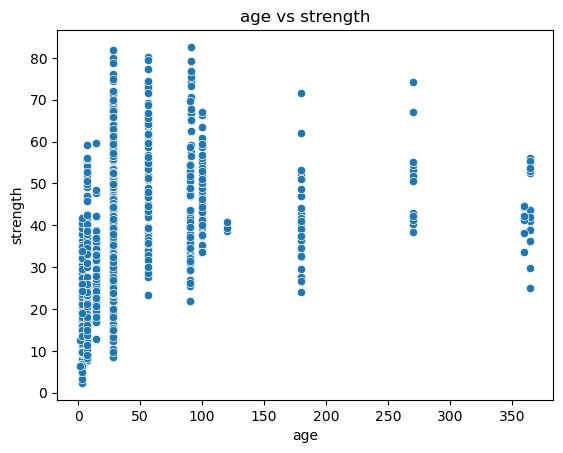

In [87]:
# Target vs Feature analysis
for col in Data.columns[:-1]:
    sns.scatterplot(x=Data[col], y=Data['strength'])
    plt.title(f'{col} vs strength')
    plt.show()


### Data Prepocessing

In [88]:
# Handling missing values
Data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [89]:
Data.duplicated().sum()

25

In [90]:
df=Data_cleaned = Data.drop_duplicates()


In [91]:
df.duplicated().sum()

0

In [92]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


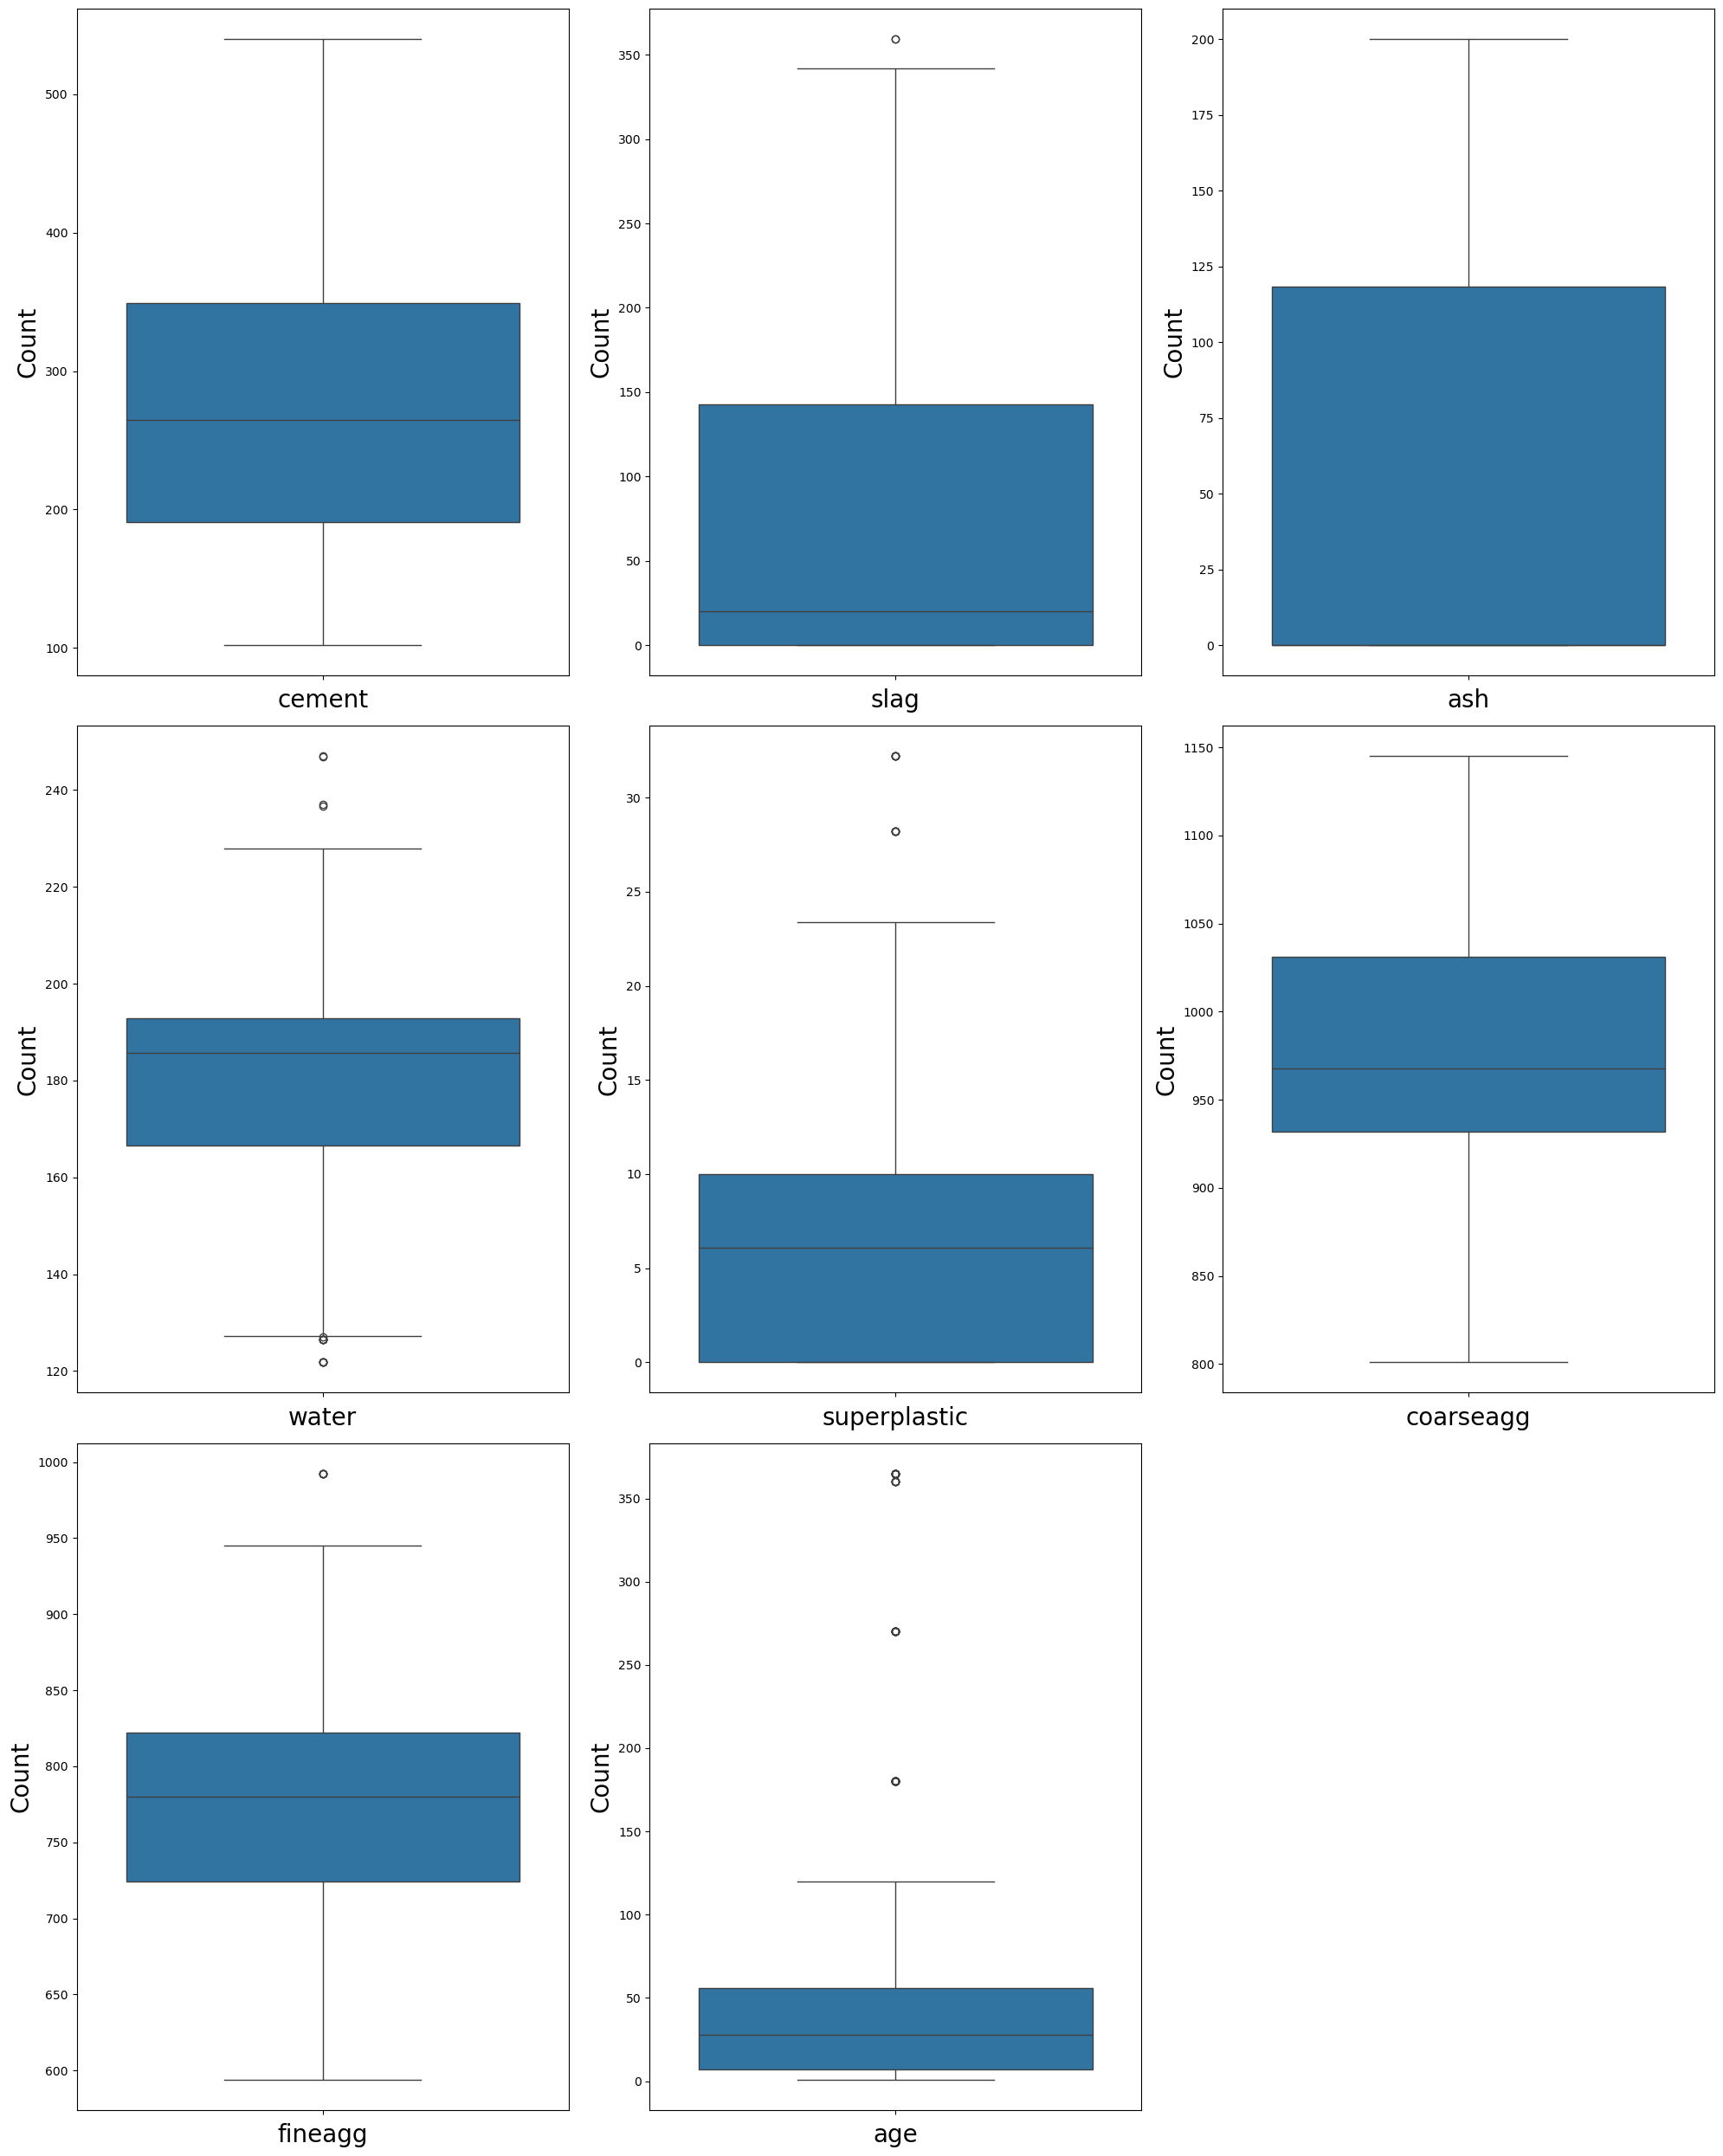

In [93]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df.drop('strength',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [94]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [95]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [96]:
features = df.drop(columns=[ "strength"])

In [97]:
def detect_outliers_iqr(df):
    outlier_indices = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()
    return outlier_indices

In [98]:
outliers_iqr = detect_outliers_iqr(features)

In [99]:
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers")

cement: 0 outliers
slag: 2 outliers
ash: 0 outliers
water: 15 outliers
superplastic: 10 outliers
coarseagg: 0 outliers
fineagg: 5 outliers
age: 59 outliers


In [100]:
all_outlier_indices = set()
for indices in outliers_iqr.values():
    all_outlier_indices.update(indices)
df_cleaned = df.drop(index=all_outlier_indices).reset_index(drop=True)

In [101]:
print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (1005, 9)
Cleaned shape: (919, 9)


In [102]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['strength']
data1=sc.fit_transform(df.drop(dl,axis=1))

In [103]:
data1

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

In [104]:
Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [105]:
type(data1)

numpy.ndarray

In [106]:
data1.shape

(1005, 8)

In [107]:
data2=pd.DataFrame(data1,columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg',  'strength'])

In [108]:
data2

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264
...,...,...,...,...,...,...,...,...
1000,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176
1001,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176
1002,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176
1003,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176


<Axes: >

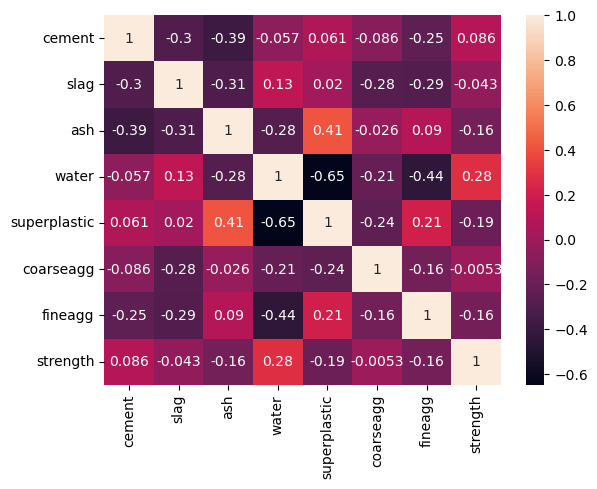

In [109]:
# feature selection
sns.heatmap(data2.corr(),annot=True)

In [110]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [112]:
X_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [113]:
y_train

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: strength, Length: 824, dtype: float64

In [114]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: strength, Length: 206, dtype: float64

In [115]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
X_train_scaled

array([[-1.16087734,  0.85738747,  0.9824489 , ..., -0.25746155,
        -0.64752011, -0.27567315],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 , -0.27567315],
       [-0.0768653 , -0.85558366,  1.06687429, ...,  1.01785948,
         0.06662828, -0.68931339],
       ...,
       [-0.86591441, -0.85558366,  1.12628475, ...,  1.34082214,
         0.33103616,  0.91561074],
       [ 1.78316909,  0.51111191, -0.83113361, ..., -1.54422615,
         0.11605031, -0.27567315],
       [ 0.28509237, -0.85558366,  0.9355459 , ..., -0.6172979 ,
         0.13458358, -0.27567315]])

In [117]:
X_test_scaled

array([[-0.1615392 ,  0.45589189, -0.83113361, ..., -0.52829244,
        -1.26158888,  5.30019728],
       [ 0.73730683,  1.31870475, -0.83113361, ..., -0.36681111,
        -0.20148625, -0.62313095],
       [ 0.99132853,  1.31870475, -0.83113361, ..., -0.36681111,
        -0.20148625, -0.27567315],
       ...,
       [ 0.02734873,  1.45560439, -0.83113361, ...,  0.39482129,
         0.3903426 , -0.62313095],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 ,  0.18760392],
       [ 0.51771297, -0.85558366, -0.83113361, ..., -0.07055009,
         0.10987256,  0.75015465]])

### Model building

In [118]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200)

In [119]:
gb_model.score(X_test,y_test)

0.9186213253186998

In [120]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
rf_model.score(X_test,y_test)

0.8841401081258502

In [122]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [123]:
dt_model.score(X_test,y_test)

0.8347503240203619

In [124]:
#LinearRegressor
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [125]:
lr_model.score(X_test,y_test)

0.627553179231485

In [126]:
#Ridge Regression (l2 Regularization)
from sklearn.linear_model import Ridge
r_model = Ridge()
r_model.fit(X_train,y_train)

Ridge()

In [127]:
r_model.score(X_test,y_test)

0.6275533521253213

In [128]:
#Lasso Regression (L1 Regression)
from sklearn.linear_model import Lasso
l_model = Lasso()
l_model.fit(X_train,y_train)

Lasso()

In [129]:
l_model.score(X_test,y_test)

0.6275979989261351

### Determining the suitable model

In [131]:
models = {
    'Linear Regression': l_model,
    'Ridge Regression': r_model,
    'Lasso Regression': lr_model,
    'DecisionTree Regressor' : dt_model,
    'Random Forest': rf_model,
    'GBRegressor' : gb_model
}
results={}
from sklearn.metrics import root_mean_squared_error, r2_score , mean_absolute_error
for name,model in models.items():
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    model_score = model.score(X_test,y_test)
    results[name] = {'RMSE': rmse, 'R²': r2, 'MAE': MAE,'Model Score' : model_score}

results_df = pd.DataFrame(results).T
results_df

,RMSE,R²,MAE,Model Score
Linear Regression,9.795886,0.627598,7.743431,0.627598
Ridge Regression,9.796474,0.627553,7.745554,0.627553
Lasso Regression,9.796476,0.627553,7.745559,0.627553
DecisionTree Regressor,6.525414,0.834750,4.293786,0.834750
Random Forest,5.463920,0.884140,3.736334,0.884140
GBRegressor,4.579236,0.918621,3.094417,0.918621


### Plotting Comparison

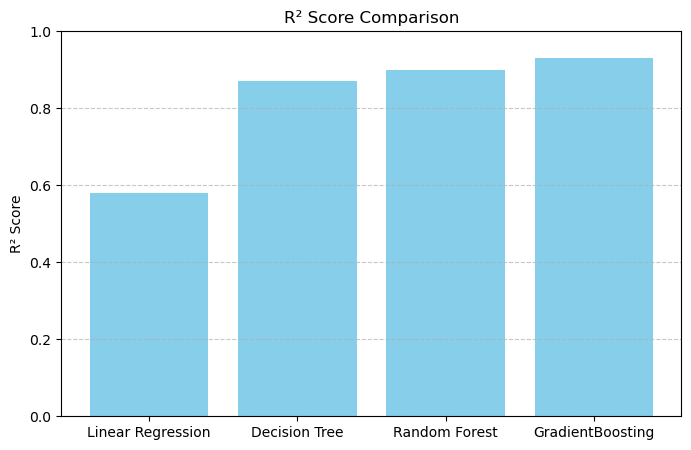

In [132]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'GradientBoosting']
r2_scores = [0.58, 0.87, 0.90, 0.93]  # Replace with your real values

plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color='skyblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Modern Comparison Report

### Create a report stating the performance of multiple models on this data and suggest the best model for production.

 Model                           R² Score  Remarks                          
 -------------------------------  --------  -------------------------------- 
    Linear Regression              0.58      Basic model, underfitting  
 
    Random Forest Regressor        0.90      Strong performance, robust
 
    Decision Tree Regressor        0.87      Good, but may overfit slightly
 
    Gradient Boosting Regressor    0.93      Best performance, well-optimized
 
    Ridge Regression               0.58      Similar to Linear Regression
 
    Lasso Regression               0.58      Similar to Linear Regression     


Based on the R² scores:

 Recommended Model: Gradient Boosting Regressor

Achieves the highest predictive accuracy (R² ≈ 0.93)

Handles non-linear relationships well

Generalizes better than single-tree methods

In [133]:
import joblib
joblib.dump(gb_model, 'gradient_boost_model.pkl')

['gradient_boost_model.pkl']


 ### **Report: Challenges Faced and Techniques Used in Concrete Strength Prediction**



 **1. Data Quality and Duplicates**

**Challenge:**

* The dataset contained **duplicate entries**, which could lead to biased model training and overfitting.

**Technique Used:**

* Used `Data.duplicated().sum()` to detect and `Data.drop_duplicates()` to remove duplicates.


 **2. Presence of Outliers**

**Challenge:**

* Several features like `cement`, `water`, and `superplasticizer` showed **extreme outliers**, visible in boxplots.

**Technique Used:**

* Applied the **IQR (Interquartile Range)** method to detect and remove rows with outliers across all features.



 **3. Data Skewness and Distribution**

**Challenge:**

* Some input features were **skewed**, and the target variable (`strength`) was not perfectly normally distributed.

**Technique Used:**

* Visualized data with histograms and scatter plots to understand skewness; models like **Random Forest** and **Gradient Boosting**, which are tree-based, were preferred as they handle skewed data better without needing transformation.



 **4. Model Selection and Performance**

**Challenge:**

* Initial models like **Linear Regression**, **Ridge**, and **Lasso** showed poor R² scores (\~0.58), indicating underfitting.

**Technique Used:**

* Switched to more complex models like **Decision Tree**, **Random Forest**, and **Gradient Boosting**, which captured non-linear patterns better.




